# Temporal-Difference Learning

If one had to identify one idea as central and novel to reinforcement learning, it would undoubtedly be **temporal-difference (TD) learning**. TD learning is a combination of Monte Carlo ideas and dynamic programming (DP) ideas. Like Monte Carlo methods, TD methods can learn directly from raw experience without a model of the environment’s dynamics. Like DP, TD methods update estimates based in part on other learned estimates, without waiting for a final outcome (they bootstrap).

# TD Prediction

Both TD and Monte Carlo methods use experience to solve the prediction problem. A simple every-visit Monte Carlo method suitable for nonstationary environments is
$$ V(S_t) \leftarrow V(S_t) + \alpha \left[G_t - V(S_t) \right] $$
where $G_t$ is the actual return following time $t$, and $\alpha$ is a constant step-size parameter.

Whereas Monte Carlo methods must wait until the end of the episode to determine the increment to $V(S_t)$, TD methods need to wait only until the next time step. At time $t + 1$ they immediately form a target and make a useful update using the observed reward $R_{t+1}$ and the estimate $V(S_{t+1})$ The simplest TD method makes the update
$$ V(S_t) \leftarrow V(S_t) + \alpha \left[R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right] $$
This TD method is called $TD(0)$, or **one-step TD**, because it is a special case of the $TD(\lambda)$.

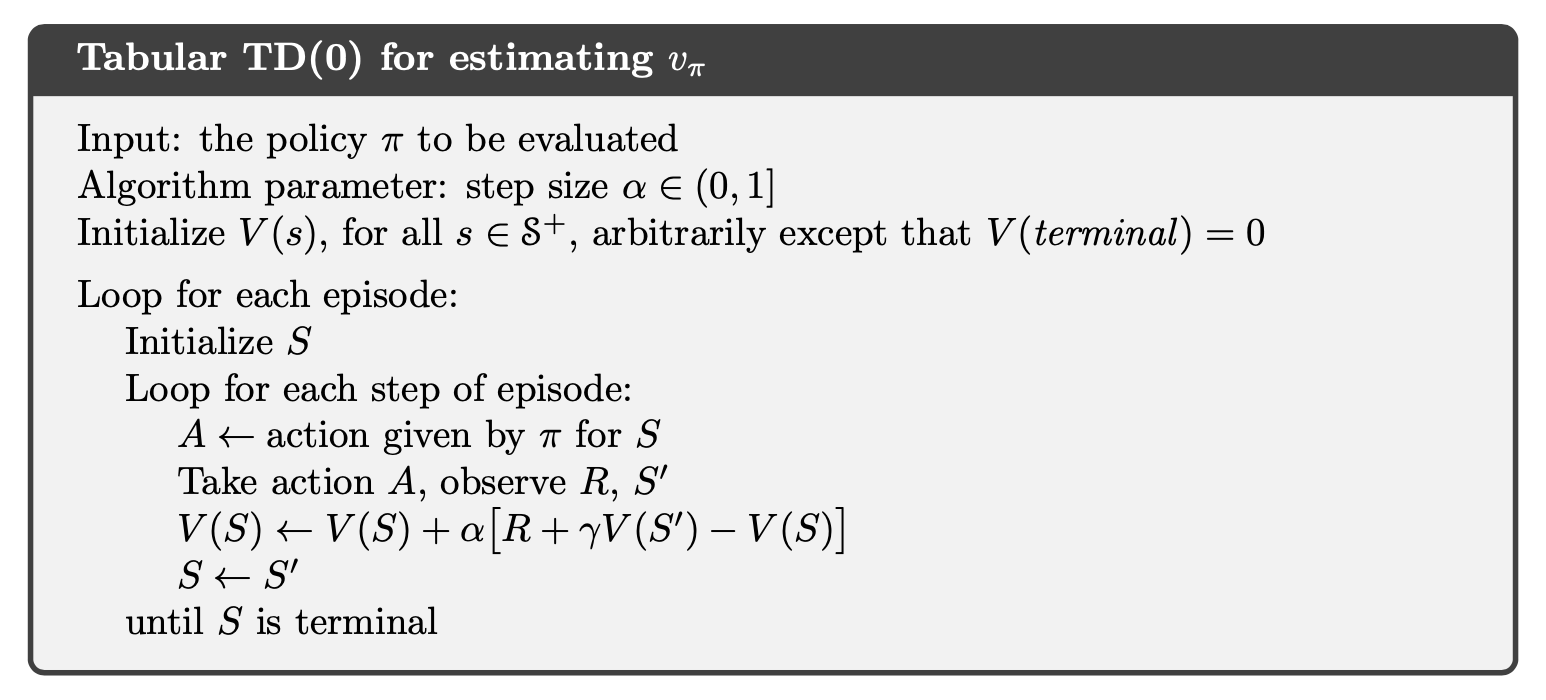

## Example: Frozen Lake

In [32]:
import gym
import pandas as pd
import numpy as np

In [38]:
env = gym.make('FrozenLake-v0')
env.nA, env.nS

(4, 16)

In [39]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [34]:
def random_policy():
    return env.action_space.sample()

In [35]:
def TD_zero(policy, alpha=0.85, gamma= 0.9, num_iterations=50000):
    V = np.zeros((16, ))
    
    for i in range(num_iterations):
        S = env.reset()
        while True:
            A = policy()
            Sp, r, done, _ = env.step(A)
            V[S] = V[S] + alpha*(r + gamma*V[Sp] - V[S])
            S = Sp
            if done: break
    return V

In [36]:
V = TD_zero(random_policy)

In [37]:
df = pd.DataFrame(enumerate(V), columns=['State', 'Value'])
df

,State,Value
0,0,1.415629e-08
1,1,8.916900e-10
2,2,9.479031e-05
3,3,9.411946e-08
4,4,1.450111e-06
5,5,0.000000e+00
6,6,1.858306e-05
7,7,0.000000e+00
8,8,8.409445e-06
9,9,6.085870e-04


# TD control

In the control method, our goal is to find the optimal policy, so we will start off with an initial random policy and then we will try to find the optimal policy iteratively.
+  In the **on-policy control**, the agent behaves using one policy and tries to improve the same policy. That is, in the on-policy method, we generate episodes using one policy and improve the same policy iteratively to find the optimal policy.
+ In the **off-policy control** method, the agent behaves using one policy and tries to improve a different policy. That is, in the off-policy method, we generate episodes using one policy and we try to improve a different policy iteratively to find the optimal policy.

# Sarsa: On-policy TD Control

The first step is to learn an action-value function rather than a state-value function. In particular, for an on-policy method we must estimate $q_\pi(s,a)$ for the current behavior policy $\pi$ and for all states $s$ and actions $a$.

we consider transitions from state–action pair to state–action pair, and learn the values of state–action pairs
$$ Q(S_t, A_t) \leftarrow  Q(S_t, A_t) + \alpha \left[R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)\right] $$

This rule uses every element of the quintuple of events, $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$, that make up a transition from one state–action pair to the next. This quintuple gives rise to the name ***Sarsa*** for the algorithm.